In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PowerTransformer
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('bank.csv', sep=';') # считываем данные
df.head() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
#df.info()
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
df.isna().sum() # нет пропущенных данных

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df.describe() # посмотрим основные статистики

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
df.describe(include = 'object')

In [ ]:
df['y'] = df['y'].map({'no':0, 
                       'yes':1})
df['y'].value_counts(normalize=True) # несбалансированный датасет

0    0.88476
1    0.11524
Name: y, dtype: float64

In [ ]:
num_cols = df.drop(['y'], axis=1).select_dtypes(exclude='O').columns # числовые признаки
cat_cols = df.select_dtypes(include='O').columns # категориальные признаки

df = pd.get_dummies(df) # кодируем категориальные признаки

['cat', 'dog', 'mouse']
[0,0,0]
[1,0,0]
[0,1,0]
[0,0,1]

In [ ]:
# y = np.array(df['y'])
# X = np.array(df.drop('y', axis = 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['y'], axis=1), 
                                                    df['y'], 
                                                    test_size=0.2, 
                                                    random_state=17, 
                                                    shuffle=True
                                                   ) # разделим на тренировочную и тестовую выборку

In [ ]:
print('Размер тренировочного датасета: {}\nРазмер тестового датасета:{}'.format(x_train.shape, x_test.shape))

Размер тренировочного датасета: (3616, 51)
Размер тестового датасета:(905, 51)


In [ ]:
#для балансировки используется метод SMOTE
#import imblearn 
#балансирвока делается только на train выборке, а test выборку трогать нельзя (там должны быть настоящие объекты)

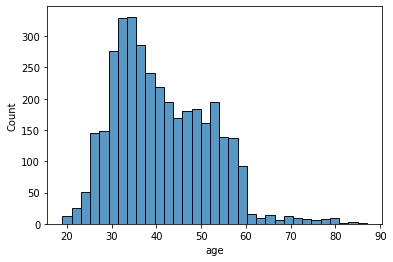

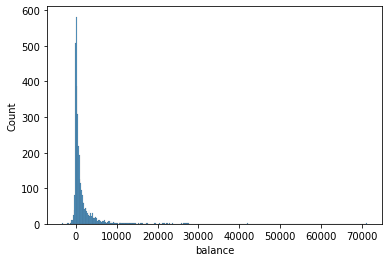

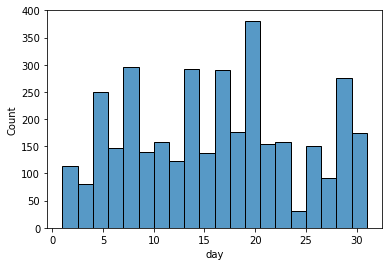

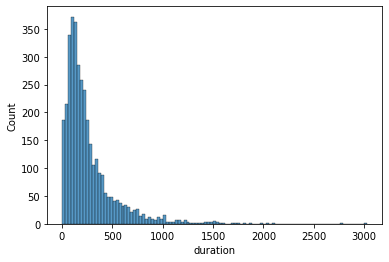

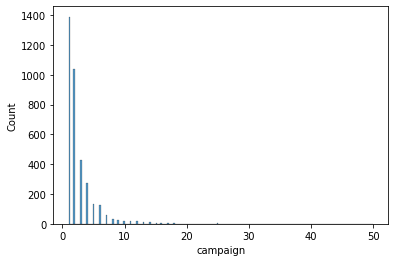

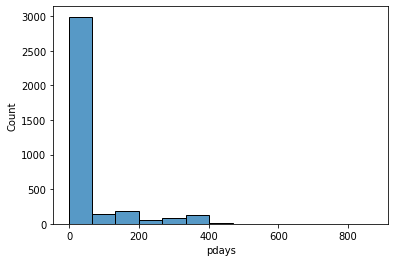

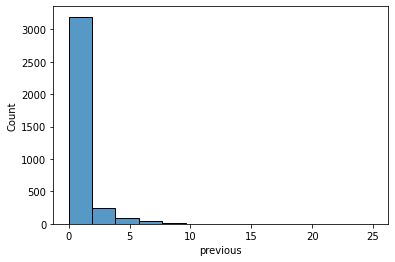

In [ ]:
for col in num_cols: # посмотрим на распределение числовых переменных
    plt.figure()
    sns.histplot(x_train[col])

In [ ]:
transformer = PowerTransformer(standardize=True) # для нормализации и стандартизации
x_train[num_cols] = transformer.fit_transform(x_train[num_cols]) # применяем к тренировочной выборке
x_test[num_cols] = transformer.transform(x_test[num_cols]) # применяем к тестовой выборке

In [ ]:
x_train.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
572,1.123738,0.109678,0.088869,0.930877,-1.114943,2.143729,2.061309,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4487,0.826335,-0.415536,-1.391683,-0.423613,-1.114943,-0.466597,-0.466669,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2326,-0.870330,-0.401458,-0.030344,1.236008,1.784082,-0.466597,-0.466669,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4373,-1.430707,-0.314564,-1.084843,1.836910,0.135458,-0.466597,-0.466669,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1866,2.857429,0.172983,0.321330,-0.156727,0.741892,2.128806,2.061309,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
knn = KNeighborsClassifier()
skf = StratifiedKFold(n_splits=7)

cv_score = cross_val_score(knn, x_train, y_train, scoring='roc_auc', cv=skf) # прогоняем модель на кросс-валидации
print('Метрика ROC-AUC на кросс-валидации: %.3f+-%.3f'% (np.mean(cv_score), np.std(cv_score)))


Метрика ROC-AUC на кросс-валидации: 0.761+-0.031


Подберем параметры модели на кросс-валидации:

In [ ]:
params = {'n_neighbors': (3, 5, 7), 
          'p': (1, 2), 
          'weights': ('uniform','distance')}
knn_grid = GridSearchCV(knn, 
                        param_grid=params, 
                        scoring='roc_auc', n_jobs=-1, cv=skf)
knn_grid.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': (3, 5, 7), 'p': (1, 2),
                         'weights': ('uniform', 'distance')},
             scoring='roc_auc')

In [ ]:
print(f'Лучшая модель на кросс-валидации с параметрами {knn_grid.best_params_} и результатом {knn_grid.best_score_}')                                                                knn_grid.best_score_,))

best_model = knn_grid.best_estimator_

Лучшая модель на кросс-валидации с параметрами {'n_neighbors': 7, 'p': 2, 'weights': 'distance'} и результатом 0.7869121084074153


Проверяем как модель работает на тестовой выборке:

In [ ]:
best_model.fit(x_train, y_train)
print('ROC_AUC на тестовой выборке: %.3f' % roc_auc_score(y_test, best_model.predict(x_test)))

ROC_AUC на тестовой выборке: 0.604


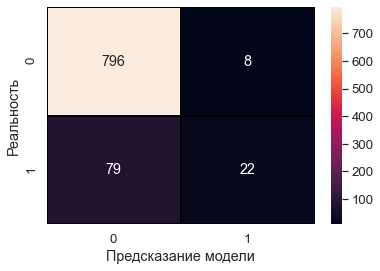

In [ ]:
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, best_model.predict(x_test)), 
            annot=True, 
            fmt = '.3g',
            linewidths=0.1,
            linecolor='black'
           );
plt.xlabel('Предсказание модели')
plt.ylabel('Реальность');

На тесте модель показывает результаты хуже чем на валидации. Тут может быть несколько причин:
- тестовая выборка отличается от тренировочной
- несбаллансированность целевого класа влияет на качество
- алгоритм kNN плохо работает на данном датасете

Поэтому для улучшения качества модели стоит проверить тренировочные и тестовые распределения, попробовать применить методы oversampling, попробовать другие алгоритмы машинного обучения